In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [32]:
kaggle_sleep = pd.read_csv('Sleep_Efficiency.csv')
kaggle_sleep.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [33]:
kaggle_sleep.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [ ]:
#drop 'Bedtime' and 'Wakeuptime' (already covered by 'Sleep Duration')
kaggle_sleep.drop(columns=['Bedtime', 'Wakeup time'], inplace=True)

In [ ]:
#convert categorical variables to numerical
kaggle_sleep['Gender'] = kaggle_sleep['Gender'].map({'Male': 0, 'Female': 1})

#convert 'Smoking Status' from 'Yes'/'No' to 1/0
kaggle_sleep['Smoking status'] = kaggle_sleep['Smoking status'].map({'Yes': 1, 'No': 0})

In [36]:
kaggle_sleep['Sleep efficiency'] = kaggle_sleep['Sleep efficiency'] * 100

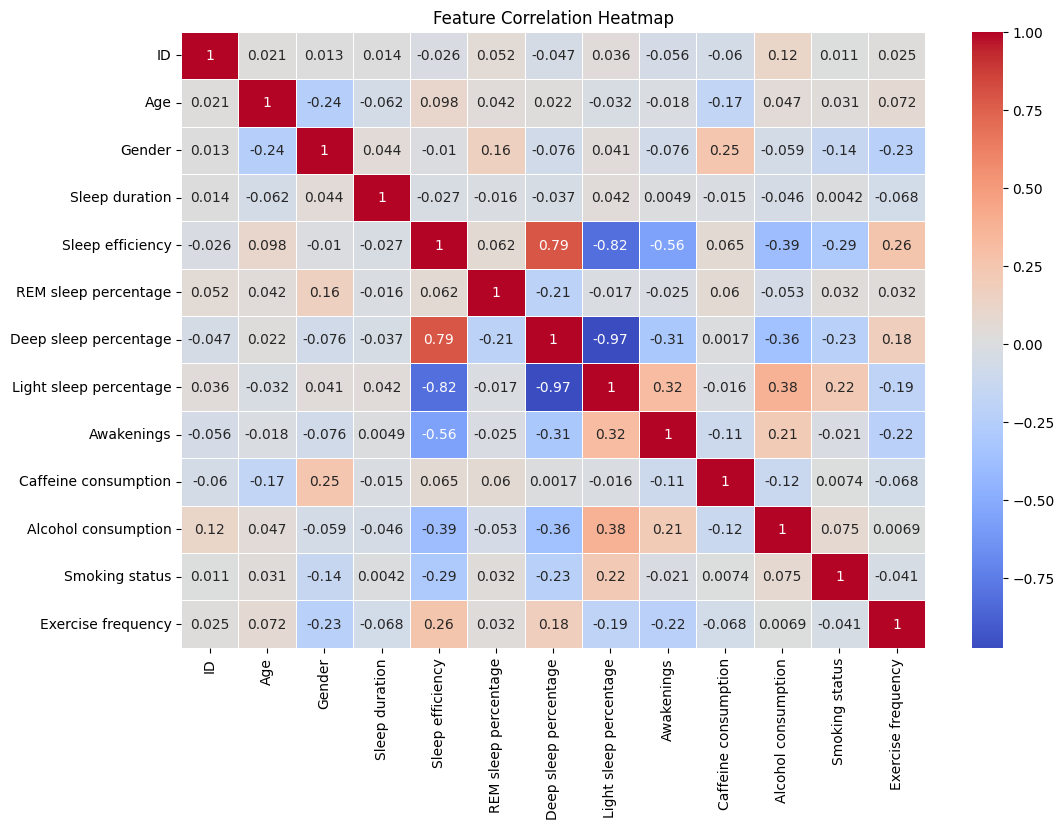

In [ ]:
#check correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(kaggle_sleep.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#deep sleep is highly correlated so not giving any new info, removing
kaggle_sleep.drop(columns=['Deep sleep percentage'], inplace=True)

In [ ]:
#replace missing or empty values in specified columns with 0
columns_to_fill = ['Awakenings', 'Caffeine consumption', 'Exercise frequency', 'Alcohol consumption']
kaggle_sleep[columns_to_fill] = kaggle_sleep[columns_to_fill].fillna(0)

#confirm the changes by checking if any missing values remain in these columns
print(kaggle_sleep[columns_to_fill].isnull().sum()) #0 if correct

Awakenings              0
Caffeine consumption    0
Exercise frequency      0
Alcohol consumption     0
dtype: int64


In [40]:
kaggle_sleep.describe()

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,226.500000,40.285398,0.495575,7.465708,78.891593,22.615044,24.561947,1.568584,22.345133,1.137168,0.340708,1.767699
std,130.625419,13.172250,0.500534,0.866625,13.523707,3.525963,15.313665,1.368698,29.848626,1.608938,0.474472,1.433375
min,1.000000,9.000000,0.000000,5.000000,50.000000,15.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,0.000000,7.000000,69.750000,20.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,0.000000,7.500000,82.000000,22.000000,18.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,339.250000,52.000000,1.000000,8.000000,90.000000,25.000000,32.500000,3.000000,50.000000,2.000000,1.000000,3.000000
max,452.000000,69.000000,1.000000,10.000000,99.000000,30.000000,63.000000,4.000000,200.000000,5.000000,1.000000,5.000000


In [ ]:
#create sleep quality categories based on sleep efficiency
def categorize_sleep_efficiency(se):
    if se >= 90:
        return "Good"
    elif 85 <= se < 90:
        return "Fair"
    elif 75 <= se < 85:
        return "Poor"
    else:
        return "Very Poor"

kaggle_sleep['Sleep Quality'] = kaggle_sleep['Sleep efficiency'].apply(categorize_sleep_efficiency)

In [42]:
kaggle_sleep.head()

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep Quality
0,1,65,1,6.0,88.0,18,12,0.0,0.0,0.0,1,3.0,Fair
1,2,69,0,7.0,66.0,19,53,3.0,0.0,3.0,1,3.0,Very Poor
2,3,40,1,8.0,89.0,20,10,1.0,0.0,0.0,0,3.0,Fair
3,4,40,1,6.0,51.0,23,52,3.0,50.0,5.0,1,1.0,Very Poor
4,5,57,0,8.0,76.0,27,18,3.0,0.0,3.0,0,3.0,Poor


In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

#define features and target variables
X = kaggle_sleep.drop(columns=['Sleep efficiency', 'Sleep Quality', 'ID'])  # Drop targets & ID
y_regression = kaggle_sleep['Sleep efficiency']  # Target for regression
y_classification = kaggle_sleep['Sleep Quality']  # Target for classification

#80/20 split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_classification, test_size=0.2, random_state=42)

#train Random Forest Regression Model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train_reg)
y_pred_reg = regressor.predict(X_test)

#evaluate Regression Model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mse ** 0.5

print("📊 Regression Model Results (Predicting Sleep Efficiency):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

#train Random Forest Classification Model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = classifier.predict(X_test_cls)

#evaluate Classification Model
print("\n Classification Model Results (Predicting Sleep Quality):")
print(classification_report(y_test_cls, y_pred_cls))

📊 Regression Model Results (Predicting Sleep Efficiency):
Mean Absolute Error (MAE): 3.64
Root Mean Squared Error (RMSE): 5.02

 Classification Model Results (Predicting Sleep Quality):
              precision    recall  f1-score   support

        Fair       0.25      0.13      0.17        15
        Good       0.62      0.80      0.70        30
        Poor       0.79      0.83      0.81        18
   Very Poor       1.00      0.89      0.94        28

    accuracy                           0.73        91
   macro avg       0.66      0.66      0.66        91
weighted avg       0.71      0.73      0.71        91

